# Behavioral data

## GABASnFR Gain adapation + Random gain

In [36]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from scipy.signal import medfilt
from scipy.stats import sem, ranksums
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set(font_scale=2, style='ticks')
t_pre = 10 # time window pre-swim
t_post = 35 # time window post-swim
t_sig = 30 # time used for significance test after swim
t_len = t_pre+t_post
t_flat = 15
t_valid = 21

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
vol_file = '../Analysis/depreciated/analysis_sections_GA_RG_SnFR.csv'
dat_xls_file = pd.read_csv(vol_file)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')

1.1728374655647384
08012019Fish1-1
17
0
38
37
27
26


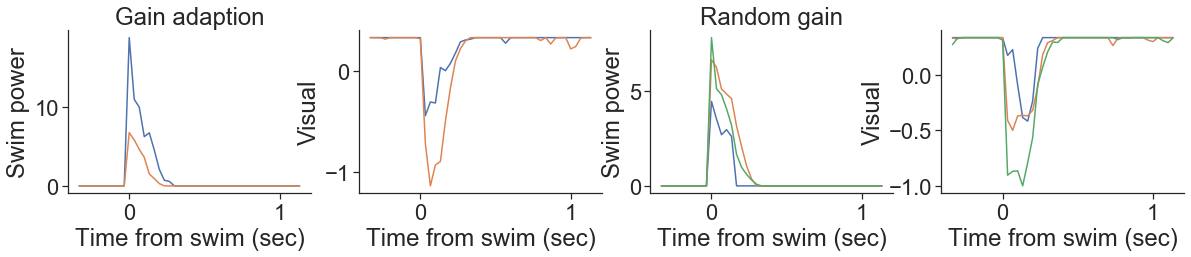

7.718407960199005
08012019Fish1-3
1
0
9
4
0
1


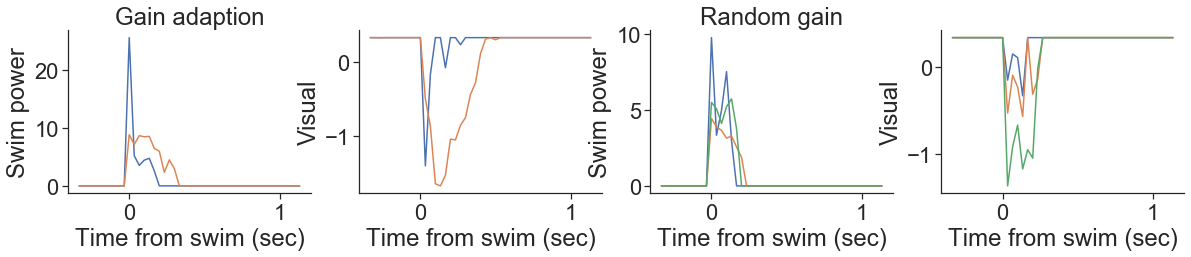

1.8094428706326724
08012019Fish2-1
42
0
31
49
51
34


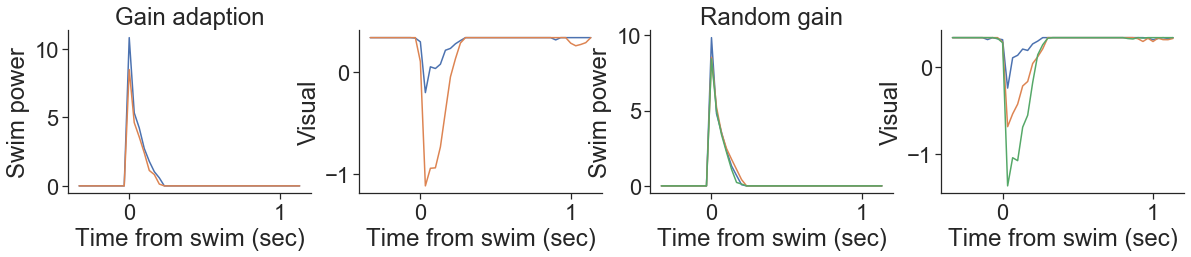

1.240656121851201
08012019Fish2-2
34
0
25
33
30
22


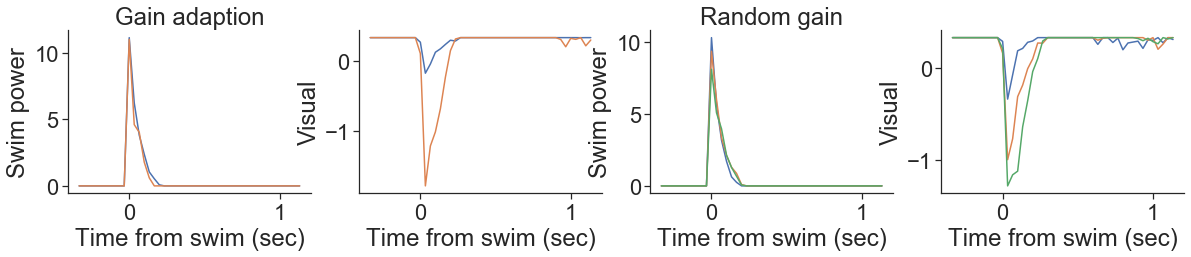

0.9482962962962963
08012019Fish2-3
3
0
6
11
14
12


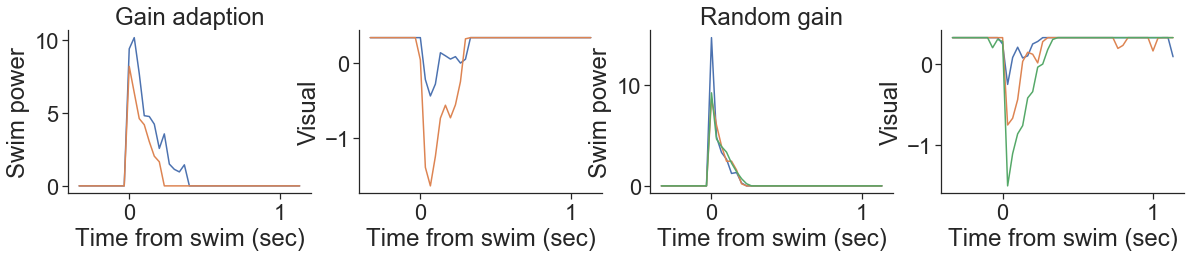

1.2279016580903375
08012019Fish3-1
35
0
57
61
59
67


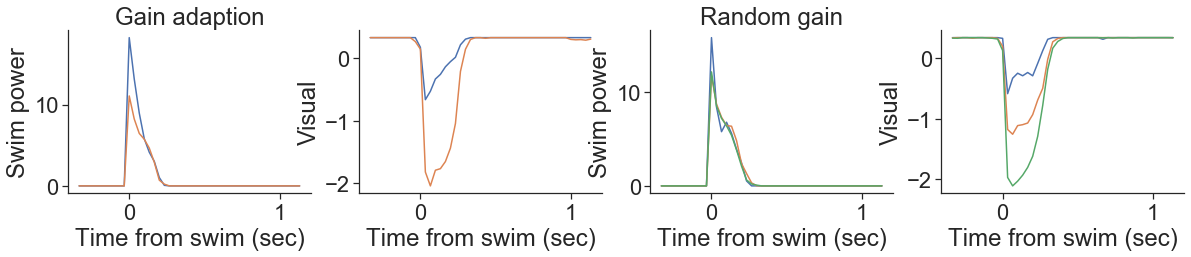

1.3224477244772446
08012019Fish3-2
43
0
54
63
61
62


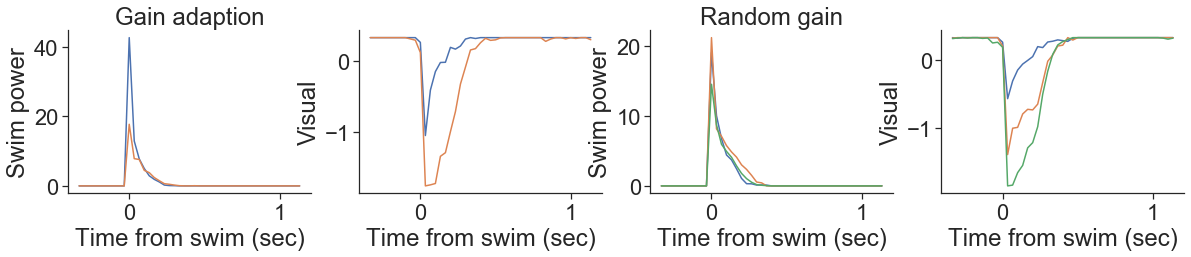

1.4418803418803419
08012019Fish3-3
7
0
10
2
1
3


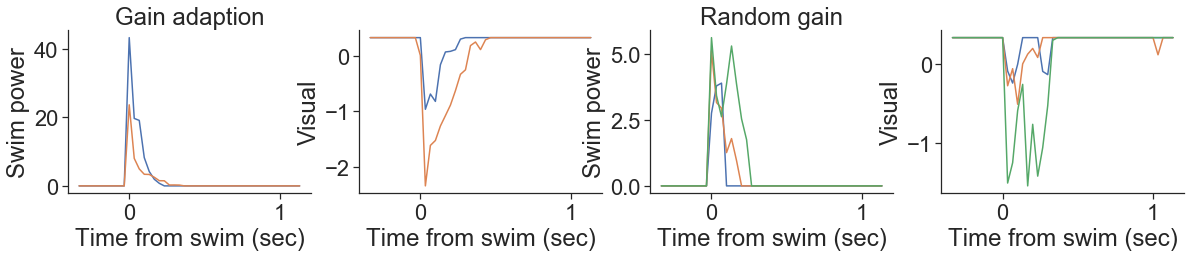

3.7316770186335404
08012019Fish4-1
15
0
8
23
20
18


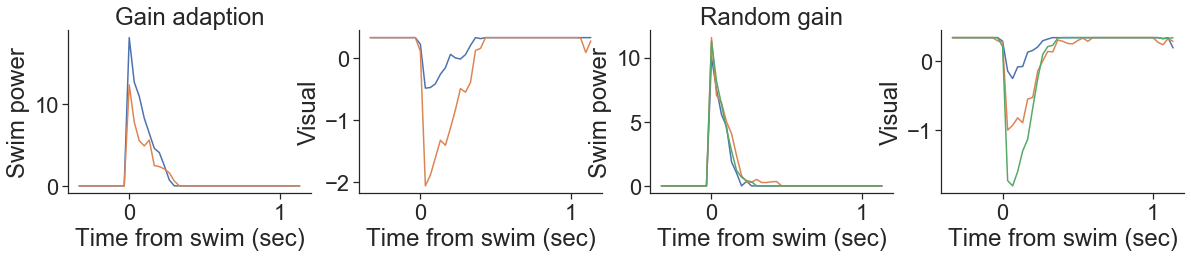

2.4633447880870563
08012019Fish4-2
15
0
15
28
17
19


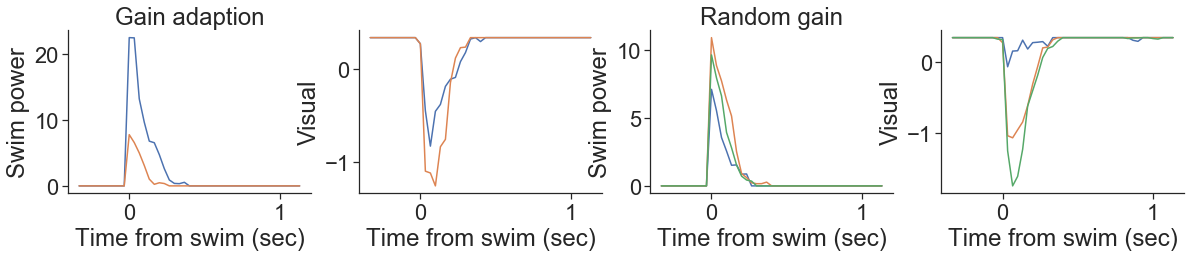

6.936569579288025
08012019Fish4-3
15
0
4
5
6
9


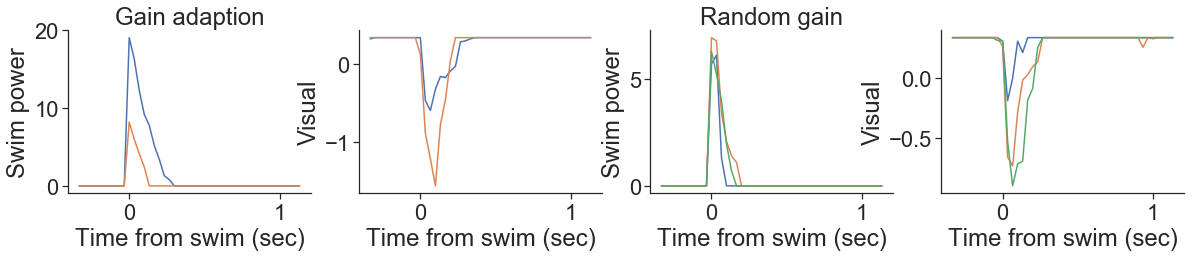

5.658953168044078
08022019Fish1-1
0
0
3
3
0
1


/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice.
/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice.
/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice.


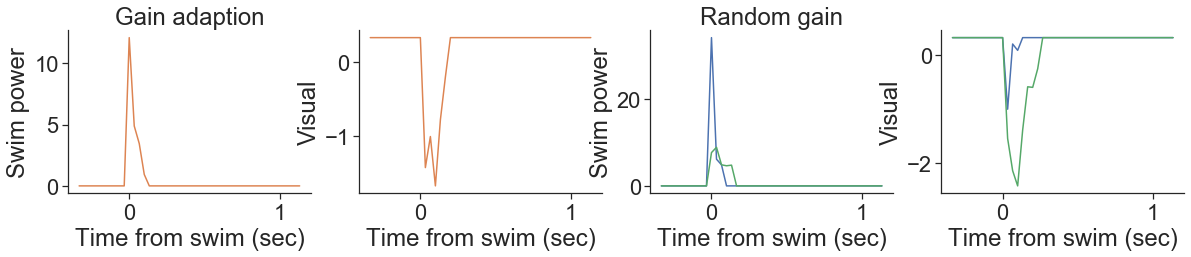

9.427272727272728
08022019Fish1-2
0
0
2
0
0
0


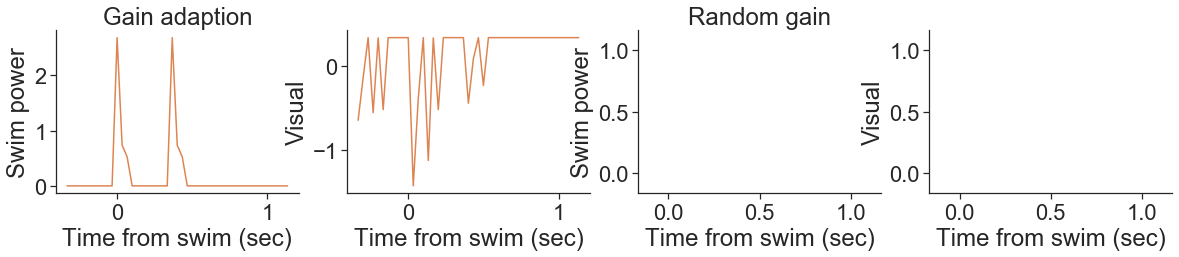

7.047222222222222
08022019Fish1-3
0
0
0
0
0
0


/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.


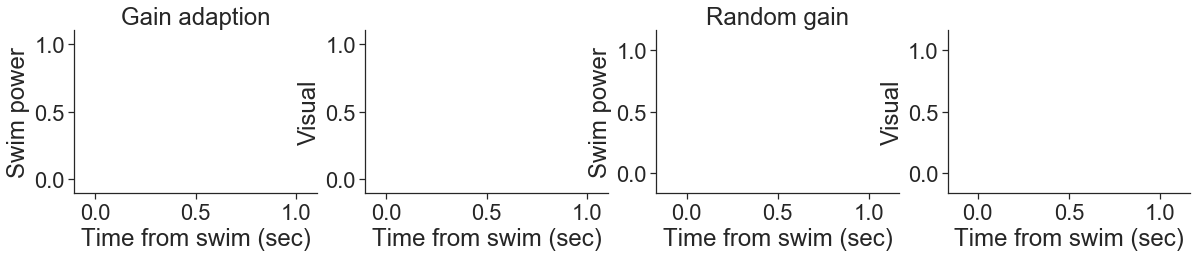

1.516417910447761
08022019Fish2-1
19
0
25
42
34
20


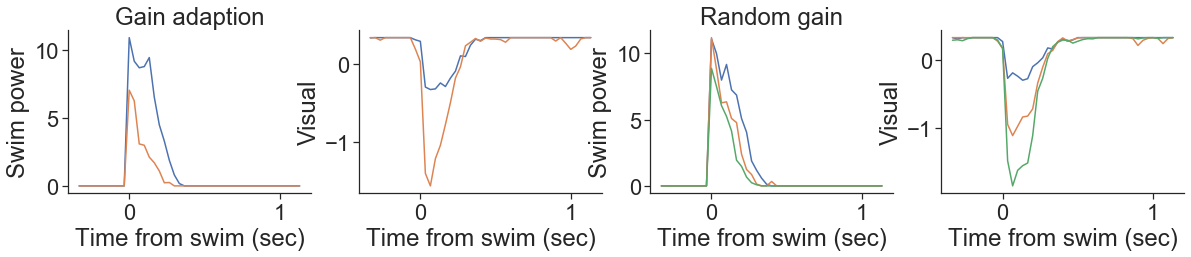

19.59907407407407
08022019Fish2-2
4
0
0
3
1
1


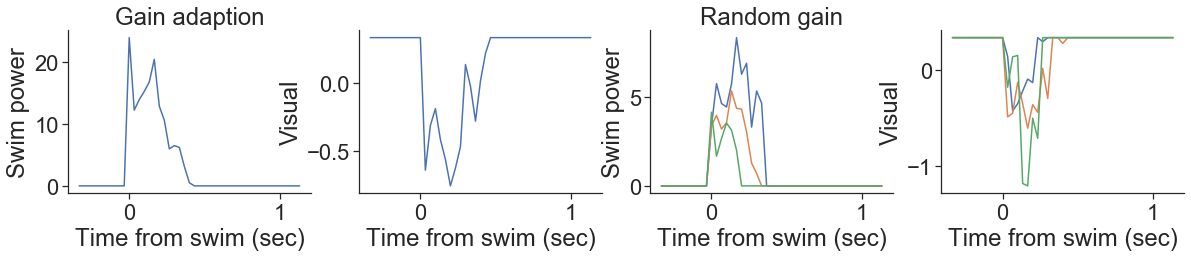

10.94923076923077
08022019Fish2-3
4
0
4
2
5
6


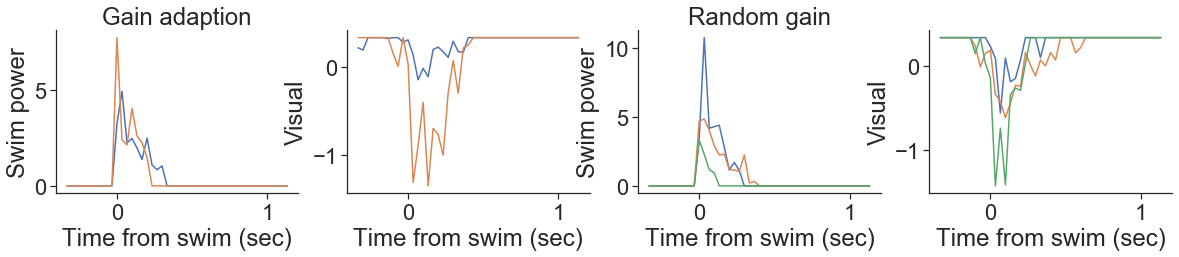

0.9641610738255033
08022019Fish3-1
15
0
24
30
30
40


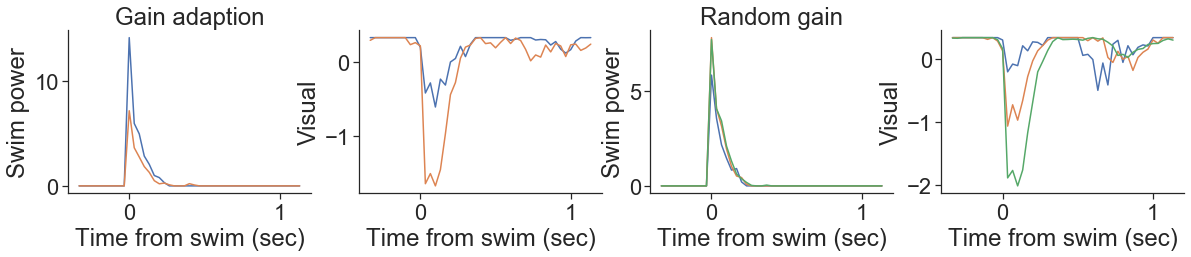

0.6815306767868438
08022019Fish3-2
0
0
9
4
7
9


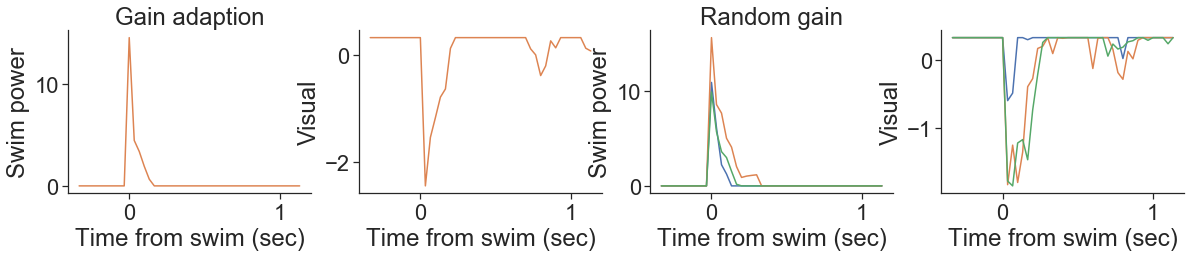

0.8206422018348625
08022019Fish3-3
9
0
30
19
34
23


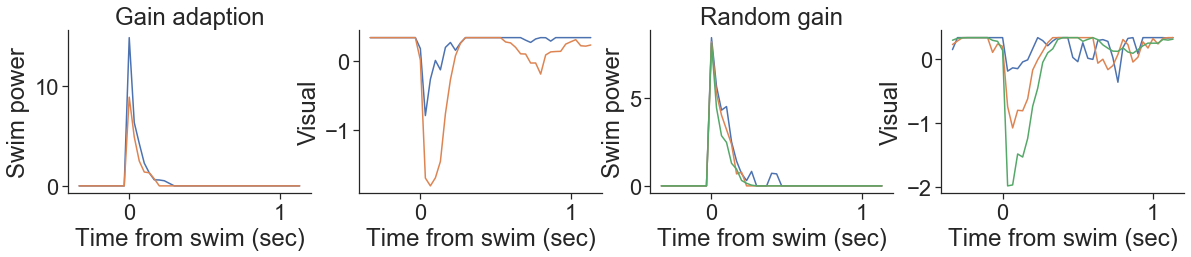

4.373375262054507
08022019Fish4-1
15
0
9
7
13
8


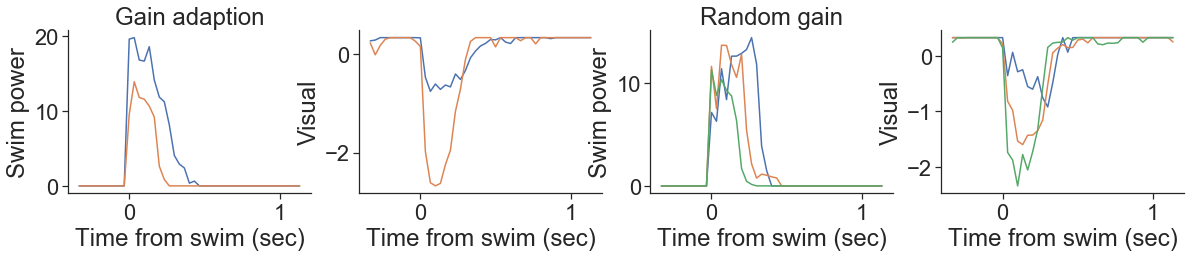

7.48
08022019Fish4-2
6
0
4
4
6
9


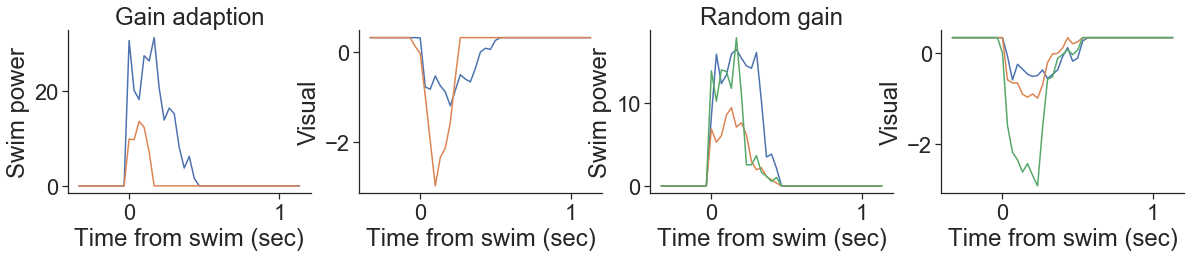

6.175574712643678
08022019Fish4-3
17
0
3
18
13
13


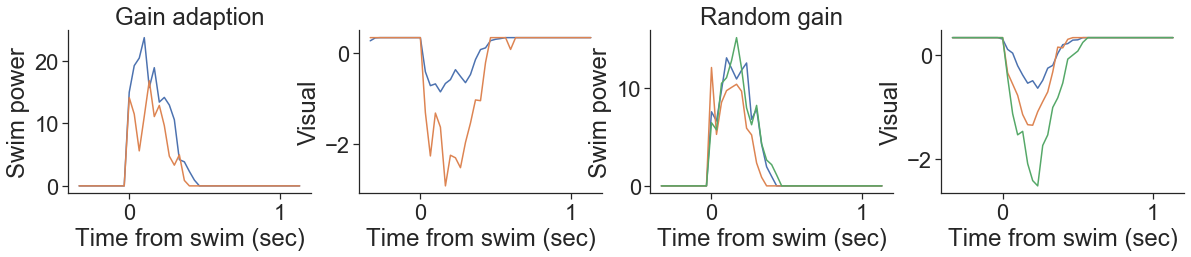

0.8571201272871918
08022019Fish5-1
10
0
16
18
22
12


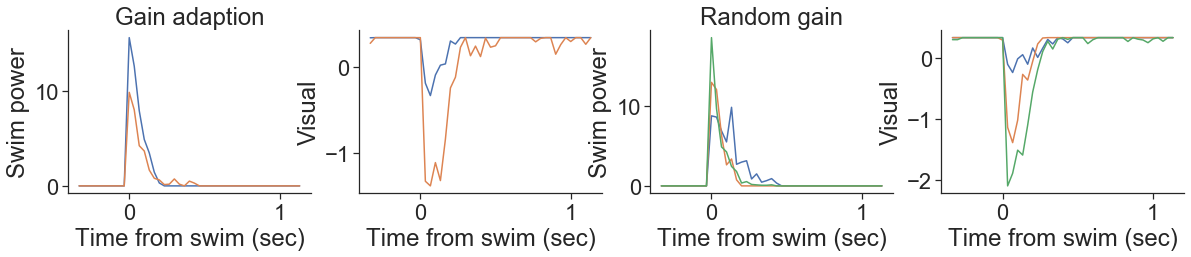

2.538970588235294
08022019Fish5-2
2
0
4
2
4
0


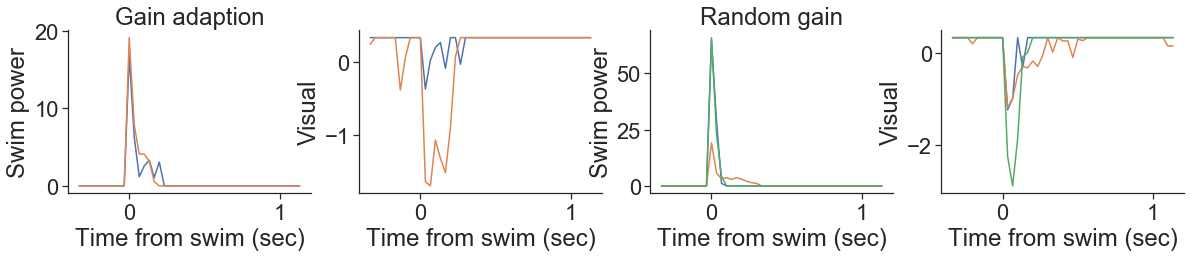

1.1023809523809522
08022019Fish5-3
2
0
0
0
0
0


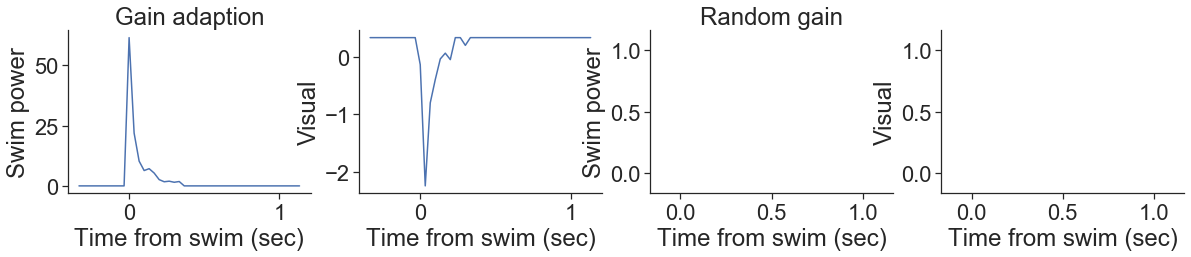

0.8657016485725774
08022019Fish6-1
13
0
31
23
17
34


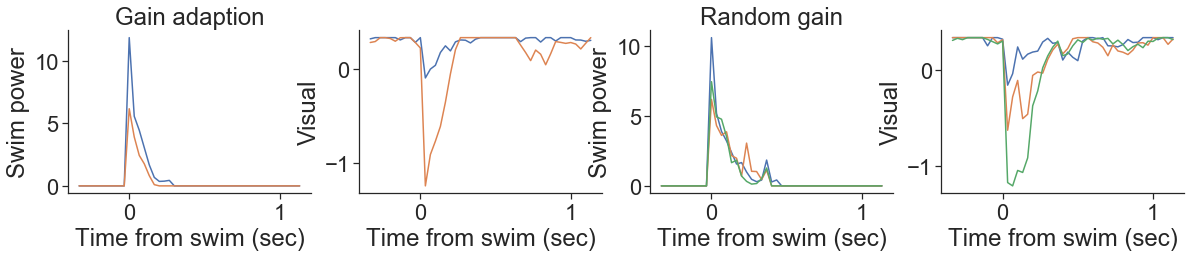

0.8054932735426009
08022019Fish6-2
12
0
24
15
17
17


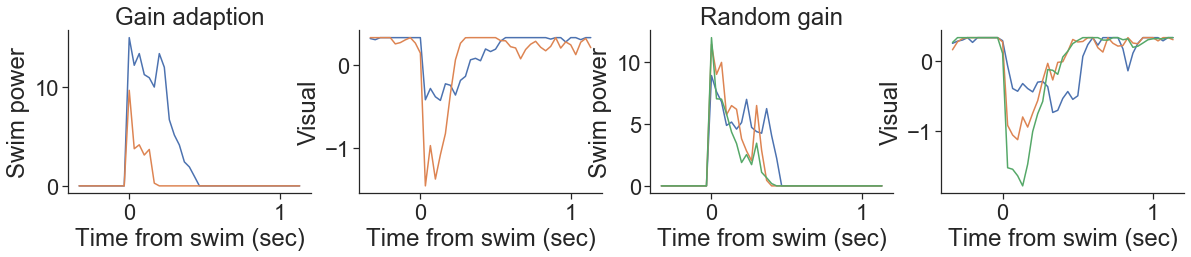

0.8481132075471698
08022019Fish6-3
6
0
17
7
6
13


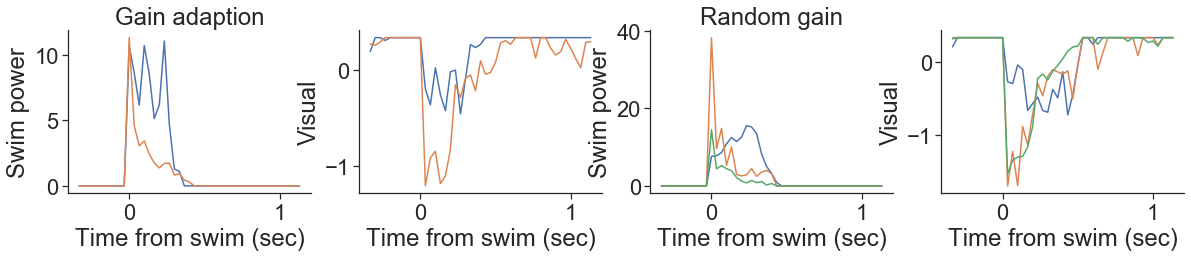

5.750980392156863
08022019Fish7-1
8
0
10
12
15
19


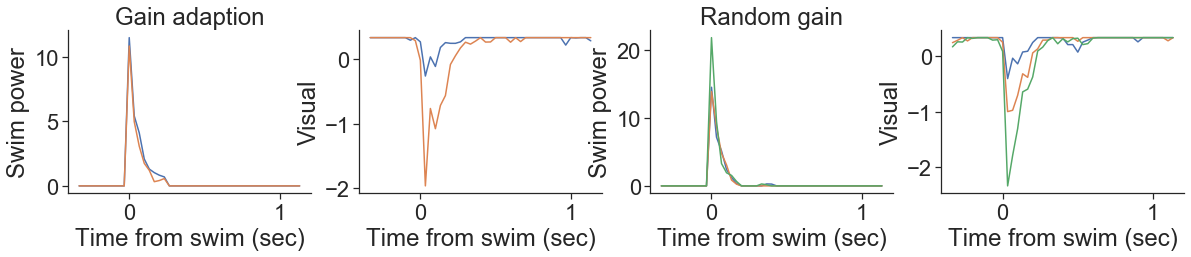

13.322916666666666
08022019Fish7-2
6
0
1
5
7
1


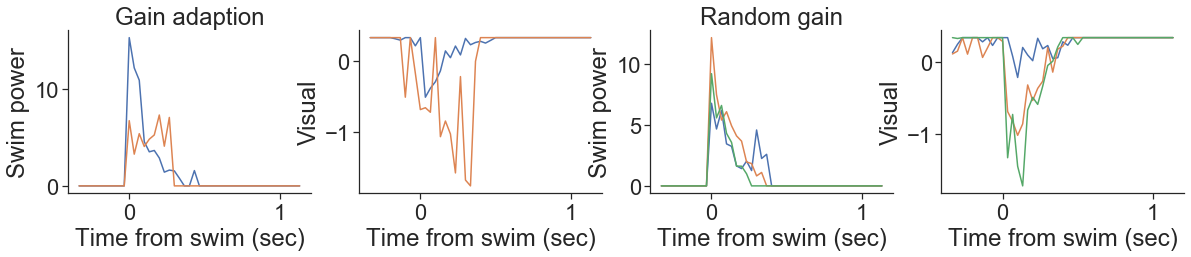

16.45772357723577
08022019Fish7-3
4
0
5
4
3
5


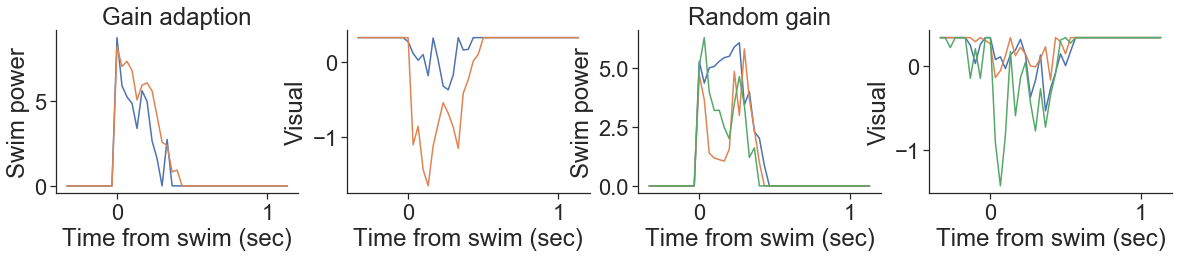

0.8577963404932378
08032019Fish1-1
20
0
31
15
12
23


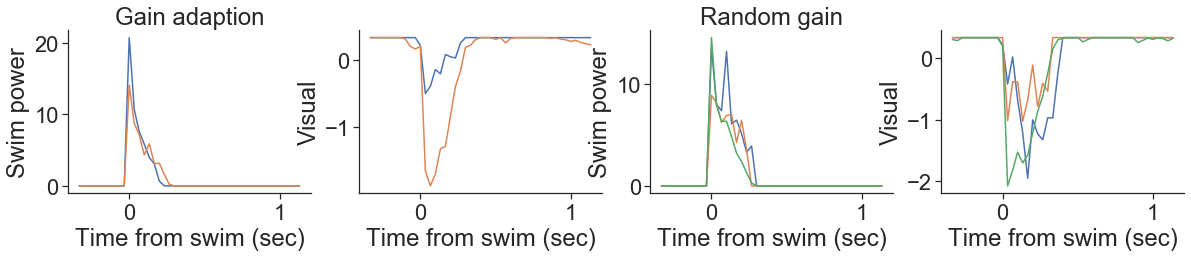

0.8747947454844007
08032019Fish1-2
3
0
40
15
15
30


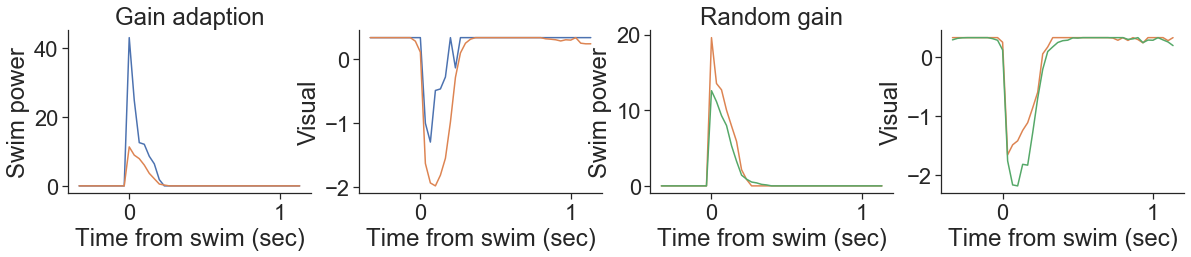

2.4507024265644954
08032019Fish1-3
8
0
15
15
18
19


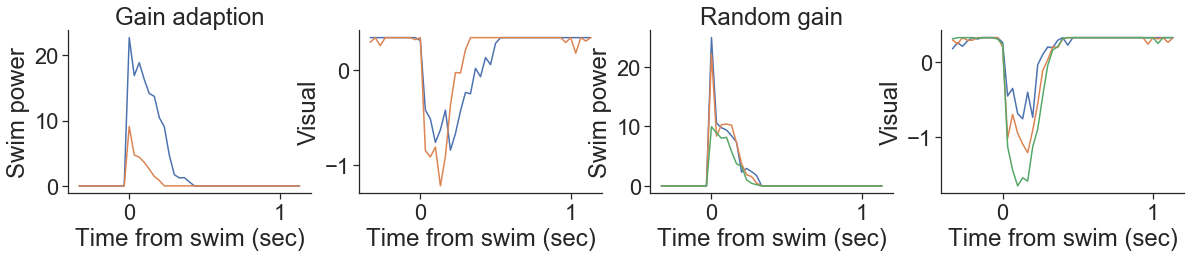

2.9497076023391813
08032019Fish2-1
6
0
18
18
11
17


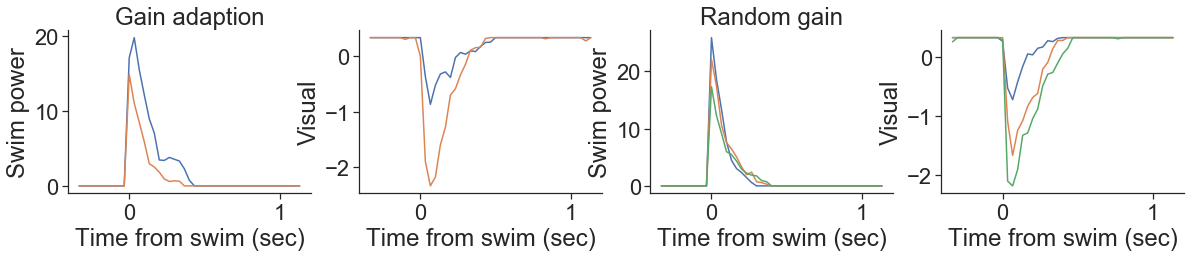

6.739015151515151
08032019Fish2-2
7
0
4
7
8
12


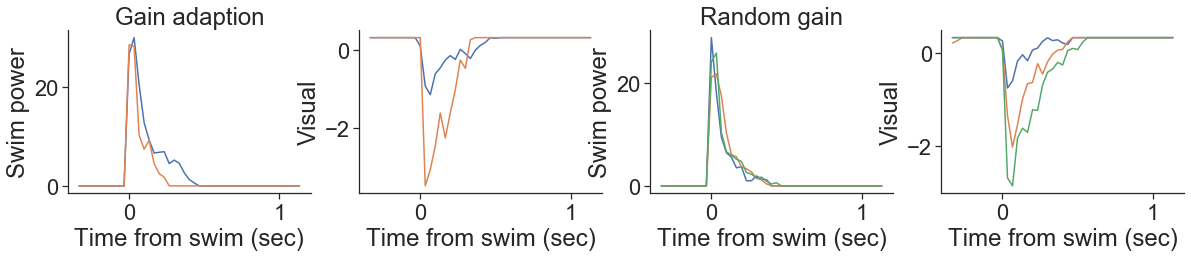

3.086320754716981
08032019Fish3-1
33
0
30
23
24
27


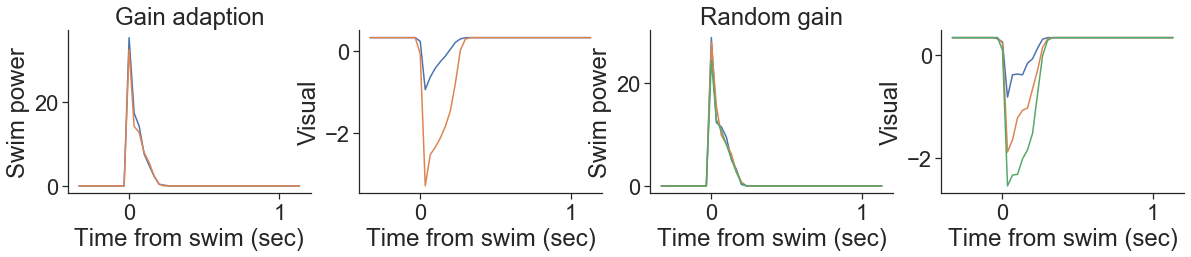

0.780709373868983
08032019Fish3-2
5
0
28
6
20
20


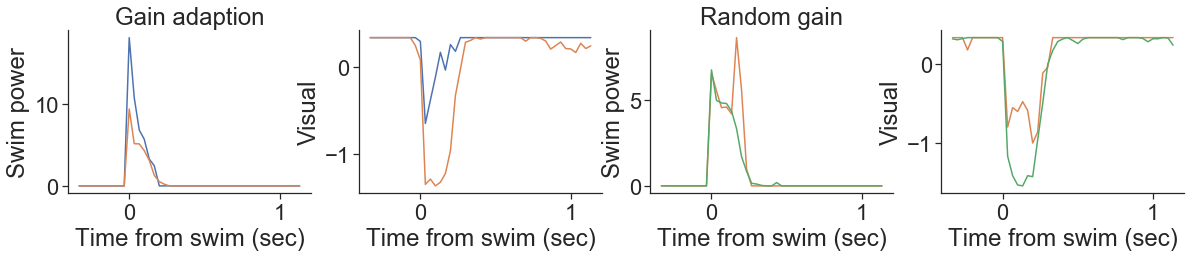

0.8539588281868566
08032019Fish3-3
4
0
39
22
31
32


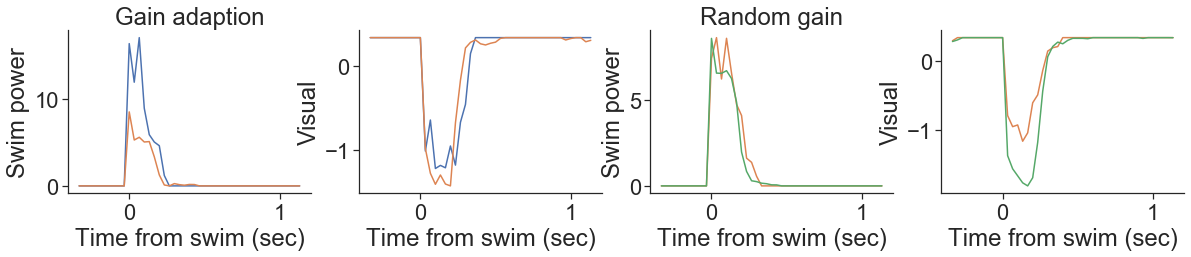

1.588993710691824
08032019Fish4-1
19
0
15
35
23
37


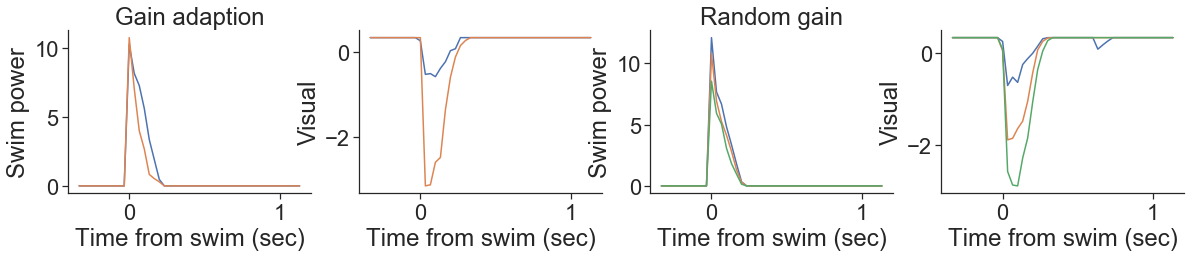

5.912541254125412
08032019Fish4-2
15
0
10
15
16
14


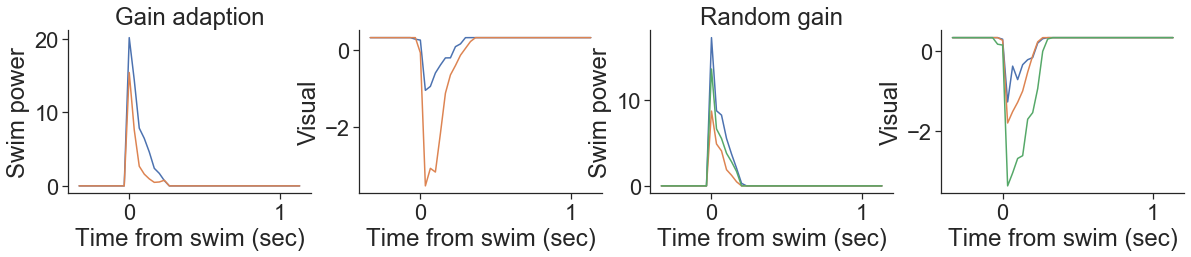

2.592
08032019Fish5-1
48
0
38
63
49
55


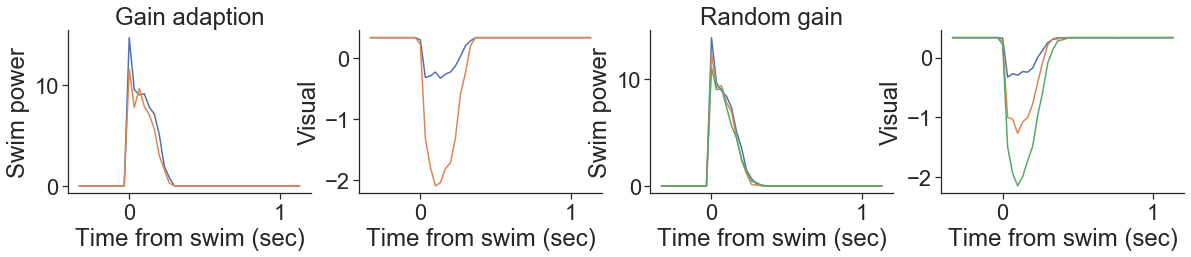

3.778222222222222
08032019Fish5-2
18
0
19
36
25
21


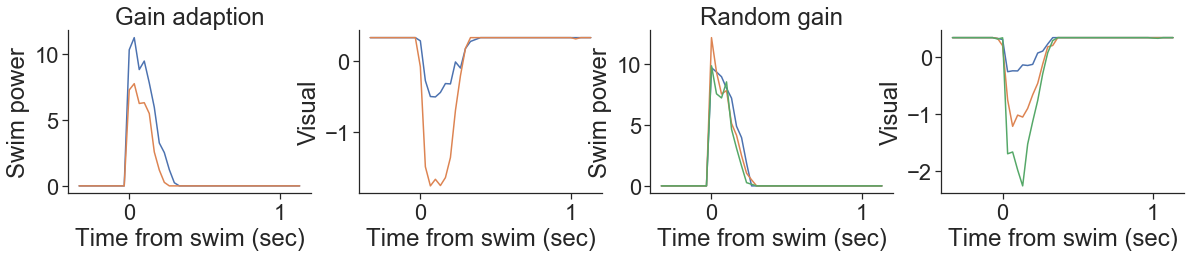

3.162062615101289
08032019Fish5-3
23
0
16
22
25
23


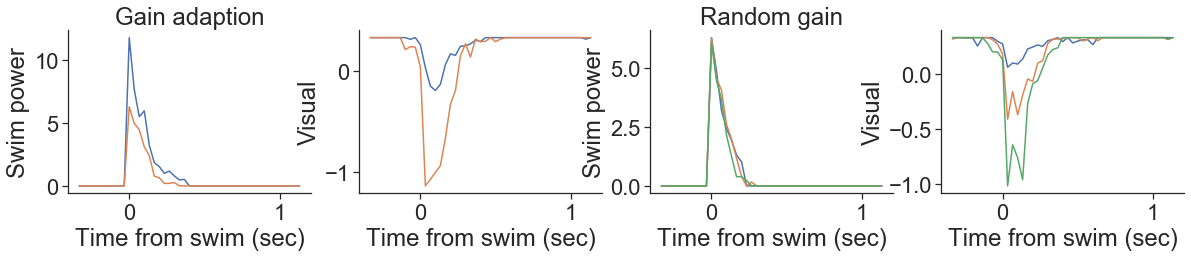

In [38]:
for _, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']
    if 'Delay' in task_type:
        continue
    _ = np.load(f'../Analysis/swim_power/{folder}_{fish}_swim_dat.npz')
    r_swim = _['r_swim']
    l_swim = _['l_swim']
    task_period = _['task_period'].astype('int')
    task_period_ = _['swim_task_index'].astype('int')
    visu = _['visu']
    p_swim = r_swim + l_swim
    swim_starts = _['swim_starts']
    swim_ends = _['swim_ends']
    swim_len = swim_ends - swim_starts
    valid_trial = (swim_len>1) & (p_swim.sum(axis=-1)>0)
    valid_trial = valid_trial & (p_swim[:, -t_valid:].sum(axis=-1)==0)
    valid_trial = valid_trial & (p_swim[:, :t_pre].sum(axis=-1)==0)
#     valid_trial = valid_trial & ((visu[:, :t_pre]<0).mean(axis=-1)==0)
#     valid_trial = valid_trial & ((visu[:, -t_valid:]<0).mean(axis=-1)==0)
    print(np.diff(swim_starts).mean()/30)
    print(folder + fish)
#     if valid_trial.sum()<40:
#         continue
    for n_ in range(1, 7):
        print((valid_trial & (task_period==n_)).sum())
    fig, ax = plt.subplots(1, 4, figsize=(20, 3))
    ax[0].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period==1)].mean(axis=0))
    ax[0].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period==3)].mean(axis=0))
    sns.despine()
    ax[0].set_xlabel('Time from swim (sec)')
    ax[0].set_ylabel('Swim power')
    ax[0].set_title('Gain adaption')
    for n in range(3):
        ax[2].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period_==4+n)].mean(axis=0))
    sns.despine()
    ax[2].set_xlabel('Time from swim (sec)')
    ax[2].set_ylabel('Swim power')
    ax[2].set_title('Random gain')
    ax[1].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period==1)].mean(axis=0))
    ax[1].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period==3)].mean(axis=0))
    sns.despine()
    ax[1].set_xlabel('Time from swim (sec)')
    ax[1].set_ylabel('Visual')
    for n in range(3):
        ax[3].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period_==4+n)].mean(axis=0))
    sns.despine()
    ax[3].set_xlabel('Time from swim (sec)')
    ax[3].set_ylabel('Visual')
    plt.show()